In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
spectrum = [[1, 2, 3, 4, 5, 6],[2000, 4040, 6500, 6000, 4020, 2070]]
energies = np.array(spectrum[0])
fluxes = np.array(spectrum[1])


 calculate probabilities

In [8]:
probs = fluxes/sum(fluxes)

In [9]:
probs

array([0.08120179, 0.16402761, 0.26390581, 0.24360536, 0.16321559,
       0.08404385])

plot pdf

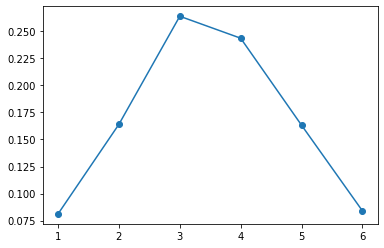

In [31]:
plt.plot(energies, probs, marker = 'o')

plot cdf

In [13]:
cum_probs = np.cumsum(probs)

In [21]:
cum_probs

array([0.08120179, 0.2452294 , 0.5091352 , 0.75274056, 0.91595615,
       1.        ])

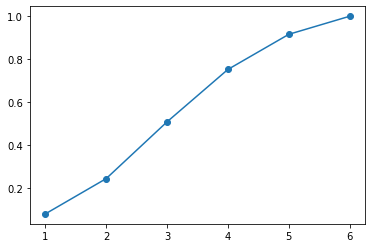

In [22]:
plt.plot(energies, cum_probs, marker='o')

In [15]:
N = 10000
R = np.random.uniform(0, 1, N)


In [27]:
r = R[0]
r

0.40929112698709247

 First, we look to find the bin interval in which the random number (from the uniform distribution) lies. To find that out, we look for the nearest bin using min(cum_prob[(cum_prob - r) > 0]))

In [20]:
cum_probs[cum_probs-r > 0]

array([0.5091352 , 0.75274056, 0.91595615, 1.        ])

In [28]:
min(cum_probs[(cum_probs - r ) > 0])

0.5091352009744214

In [30]:
np.argwhere(cum_probs == min(cum_probs[(cum_probs - r) > 0]))

array([[2]])

returns same

In [52]:
import bisect

In [53]:
bisect.bisect_left(cum_probs, r)

2

In [33]:
gen_energies = [int(energies[np.argwhere(cum_probs == min(cum_probs[(cum_probs - r) > 0]))]) for r in R]


In [34]:
gen_energies

[3,
 3,
 2,
 2,
 1,
 3,
 1,
 5,
 4,
 6,
 5,
 5,
 2,
 5,
 4,
 3,
 5,
 5,
 5,
 4,
 4,
 3,
 1,
 3,
 2,
 5,
 1,
 3,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 2,
 4,
 6,
 3,
 3,
 4,
 1,
 3,
 2,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 2,
 4,
 6,
 4,
 2,
 4,
 2,
 2,
 3,
 4,
 6,
 4,
 1,
 3,
 5,
 4,
 2,
 4,
 4,
 4,
 6,
 1,
 6,
 4,
 6,
 2,
 6,
 4,
 3,
 4,
 1,
 4,
 4,
 5,
 3,
 3,
 5,
 5,
 4,
 4,
 4,
 1,
 5,
 3,
 4,
 4,
 3,
 5,
 2,
 3,
 3,
 5,
 2,
 5,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 1,
 6,
 5,
 5,
 1,
 6,
 2,
 4,
 1,
 3,
 4,
 3,
 5,
 5,
 3,
 3,
 6,
 5,
 3,
 2,
 5,
 4,
 1,
 5,
 4,
 4,
 2,
 5,
 4,
 2,
 3,
 6,
 4,
 5,
 5,
 5,
 2,
 3,
 6,
 4,
 3,
 4,
 5,
 1,
 3,
 3,
 4,
 3,
 3,
 5,
 2,
 6,
 3,
 1,
 2,
 5,
 5,
 3,
 3,
 5,
 3,
 3,
 2,
 3,
 5,
 5,
 4,
 5,
 2,
 2,
 1,
 4,
 3,
 2,
 4,
 5,
 2,
 4,
 4,
 3,
 6,
 3,
 4,
 5,
 4,
 3,
 3,
 1,
 5,
 2,
 6,
 2,
 6,
 2,
 5,
 4,
 5,
 3,
 3,
 3,
 6,
 6,
 4,
 3,
 4,
 4,
 3,
 5,
 6,
 3,
 5,
 4,
 2,
 5,
 4,
 6,
 4,
 3,
 2,
 6,
 6,
 3,
 3,
 4,
 4,
 5,
 4,
 4,
 3,
 5,
 3,
 4,
 5,
 6,
 1,
 5,
 1,
 1,


In [42]:
sampled_values = [np.sum(gen_energies==e) for e in energies]
sampled_values

[820, 1564, 2610, 2496, 1700, 810]

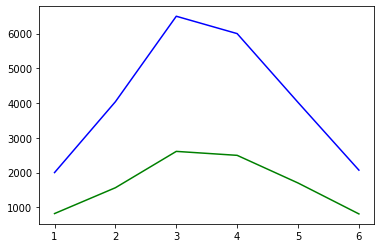

In [48]:
plt.plot(energies,sampled_values, color = 'g')

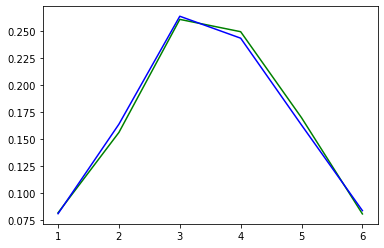

In [50]:
pdf_sampled_values = sampled_values/sum(sampled_values)

plt.plot(energies,pdf_sampled_values,color = 'g' )
plt.plot(energies, probs, 'b' )
